In [1]:
import pandas as pd
import numpy as np

In [2]:
import nltk
## nltk.download()     ### To check we have required packages downloaded

In [3]:
dir(nltk)    ### Evry method and function this package contains

['AbstractLazySequence',
 'AffixTagger',
 'AlignedSent',
 'Alignment',
 'AnnotationTask',
 'ApplicationExpression',
 'Assignment',
 'BigramAssocMeasures',
 'BigramCollocationFinder',
 'BigramTagger',
 'BinaryMaxentFeatureEncoding',
 'BlanklineTokenizer',
 'BllipParser',
 'BottomUpChartParser',
 'BottomUpLeftCornerChartParser',
 'BottomUpProbabilisticChartParser',
 'Boxer',
 'BrillTagger',
 'BrillTaggerTrainer',
 'CFG',
 'CRFTagger',
 'CfgReadingCommand',
 'ChartParser',
 'ChunkParserI',
 'ChunkScore',
 'Cistem',
 'ClassifierBasedPOSTagger',
 'ClassifierBasedTagger',
 'ClassifierI',
 'ConcordanceIndex',
 'ConditionalExponentialClassifier',
 'ConditionalFreqDist',
 'ConditionalProbDist',
 'ConditionalProbDistI',
 'ConfusionMatrix',
 'ContextIndex',
 'ContextTagger',
 'ContingencyMeasures',
 'CoreNLPDependencyParser',
 'CoreNLPParser',
 'Counter',
 'CrossValidationProbDist',
 'DRS',
 'DecisionTreeClassifier',
 'DefaultTagger',
 'DependencyEvaluator',
 'DependencyGrammar',
 'DependencyGrap

In [4]:
from nltk.corpus import stopwords       ### Words used frequently but don't contribute to analysis like in sentiment analysis they are sentiment neutral 
stopwords.words('english')[0:500:25]

['i', 'herself', 'been', 'with', 'here', 'very', 'doesn', 'won']

#### Text data is form of unstructured data i.e without any columns and rows indiacations.

In [5]:
raw_data=open('SMSSpamCollection.tsv').read()
raw_data[0:500]

"ham\tI've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times.\nspam\tFree entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's\nham\tNah I don't think he goes to usf, he lives around here though\nham\tEven my brother is not like to speak with me. They treat me like aid"

#### \t are between labels and text body while \n are at the end of each line

In [6]:
parsedData=raw_data.replace('\t','\n').split('\n')

#### So for parcing such data remember that we need functions like "replace" , "split" and "open" for file_opening.

In [7]:
parsedData[0:5]

['ham',
 "I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times.",
 'spam',
 "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
 'ham']

Now we have a list with alternative positions occupied by LABELS.

In [8]:
labelList=parsedData[0::2]      ### parsed List is taking in every alternative element
TextList=parsedData[1::2]

In [9]:
print(labelList[0:5])
print(TextList[0:5])

['ham', 'spam', 'ham', 'ham', 'ham']
["I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times.", "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's", "Nah I don't think he goes to usf, he lives around here though", 'Even my brother is not like to speak with me. They treat me like aids patent.', 'I HAVE A DATE ON SUNDAY WITH WILL!!']


In [10]:
fullCorpus=pd.DataFrame({'TextData':TextList, 'Labels':labelList[:-1]})
fullCorpus.head()

,TextData,Labels
0,I've been searching for the right words to tha...,ham
1,Free entry in 2 a wkly comp to win FA Cup fina...,spam
2,"Nah I don't think he goes to usf, he lives aro...",ham
3,Even my brother is not like to speak with me. ...,ham
4,I HAVE A DATE ON SUNDAY WITH WILL!!,ham


#### More advanced way to parse this data is through pandas. e.g

In [11]:
fullCorpus_pd=pd.read_csv('SMSSpamCollection.tsv',sep='\t',header=None)
fullCorpus_pd.head()

,0,1
0,ham,I've been searching for the right words to tha...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,"Nah I don't think he goes to usf, he lives aro..."
3,ham,Even my brother is not like to speak with me. ...
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!


#### Now we must do some high level data exploration such as shape, NAN values and ham,spam count

In [12]:
fullCorpus.shape

(5570, 2)

In [13]:
fullCorpus.info()                     ### To check for null objects

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5570 entries, 0 to 5569
Data columns (total 2 columns):
TextData    5570 non-null object
Labels      5570 non-null object
dtypes: object(2)
memory usage: 87.1+ KB


In [14]:
fullCorpus['Labels'].value_counts()

ham     4824
spam     746
Name: Labels, dtype: int64

#### REGEx Functions

In [15]:
import re

RE is used for searching special words within documents i.e tokenization that is then useful for making a ML model.

important REGEx fucntions are:

#### re.search(pattern,string,flags)
#### re.findall(pattern,string)
#### re.split()  split string at match
#### re.sub('pattern','with what',string)

#### re.fullmatch(pattern, string, flags=0)
If the whole string matches the regular expression pattern, return a corresponding match object

#### re.finditer(pattern, string, flags=0)
Return an iterator yielding match objects over all non-overlapping matches for the RE pattern in string. The string is scanned left-to-right, and matches are returned in the order found. Empty matches are included in the result.

#### re.escape(pattern)
Escape special characters in pattern. This is useful if you want to match an arbitrary literal string that may have regular expression metacharacters in it

### Pre-Processing Text Data

1. Remove Punctuation

2. Tokenization

3. Remove Stpwords

4. Lemmitization/stem

#### Remove Punctuation

In [16]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [17]:
def remove_punct(text):
    
    new_list="".join([char for char in text if char not in string.punctuation])
    
    return new_list

fullCorpus['punct_removed']=fullCorpus['TextData'].apply(lambda x: remove_punct(x))

In [18]:
fullCorpus.head()

,TextData,Labels,punct_removed
0,I've been searching for the right words to tha...,ham,Ive been searching for the right words to than...
1,Free entry in 2 a wkly comp to win FA Cup fina...,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,"Nah I don't think he goes to usf, he lives aro...",ham,Nah I dont think he goes to usf he lives aroun...
3,Even my brother is not like to speak with me. ...,ham,Even my brother is not like to speak with me T...
4,I HAVE A DATE ON SUNDAY WITH WILL!!,ham,I HAVE A DATE ON SUNDAY WITH WILL


#### Tokenization

In [19]:
def tokenization(text):
    tokens=re.split('\W+',text)
    return tokens

fullCorpus['Tokenized_data']=fullCorpus['punct_removed'].apply(lambda x: tokenization(x.lower()))

In [20]:
fullCorpus.head()

,TextData,Labels,punct_removed,Tokenized_data
0,I've been searching for the right words to tha...,ham,Ive been searching for the right words to than...,"[ive, been, searching, for, the, right, words,..."
1,Free entry in 2 a wkly comp to win FA Cup fina...,spam,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f..."
2,"Nah I don't think he goes to usf, he lives aro...",ham,Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l..."
3,Even my brother is not like to speak with me. ...,ham,Even my brother is not like to speak with me T...,"[even, my, brother, is, not, like, to, speak, ..."
4,I HAVE A DATE ON SUNDAY WITH WILL!!,ham,I HAVE A DATE ON SUNDAY WITH WILL,"[i, have, a, date, on, sunday, with, will]"


#### we used x.lower because python doesn't know that upper and lower case are not different

In [21]:
stopword=stopwords.words('english')

In [22]:
def remove_stopwords(text1):
    new_text=[word for word in text1 if word not in stopword]
    return new_text

fullCorpus['Stopwords_Removed']=fullCorpus['Tokenized_data'].apply(lambda x: remove_stopwords(x))

In [23]:
fullCorpus.head()

,TextData,Labels,punct_removed,Tokenized_data,Stopwords_Removed
0,I've been searching for the right words to tha...,ham,Ive been searching for the right words to than...,"[ive, been, searching, for, the, right, words,...","[ive, searching, right, words, thank, breather..."
1,Free entry in 2 a wkly comp to win FA Cup fina...,spam,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin..."
2,"Nah I don't think he goes to usf, he lives aro...",ham,Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[nah, dont, think, goes, usf, lives, around, t..."
3,Even my brother is not like to speak with me. ...,ham,Even my brother is not like to speak with me T...,"[even, my, brother, is, not, like, to, speak, ...","[even, brother, like, speak, treat, like, aids..."
4,I HAVE A DATE ON SUNDAY WITH WILL!!,ham,I HAVE A DATE ON SUNDAY WITH WILL,"[i, have, a, date, on, sunday, with, will]","[date, sunday]"


#### Stemming

Keeping base words and remove the derivations of words e.g Connection/Connected/Connectivity are all reduced to Connect

#### Stemmers included in NLTK package are:

1. Porter Stemmer

2. Snowball Stemmer

3. Lancaster stemmer

4. Regex based Stemmer

In [24]:
ps=nltk.PorterStemmer()

In [25]:
def stemming(tokenized_text):
    new_text1=[ps.stem(word) for word in tokenized_text]
    return new_text1

fullCorpus['Cleaned_data']=fullCorpus['Tokenized_data'].apply(lambda x: stemming(x))

In [26]:
fullCorpus.drop(columns=['punct_removed','Stopwords_Removed'],inplace=True)

In [27]:
fullCorpus.head()

,TextData,Labels,Tokenized_data,Cleaned_data
0,I've been searching for the right words to tha...,ham,"[ive, been, searching, for, the, right, words,...","[ive, been, search, for, the, right, word, to,..."
1,Free entry in 2 a wkly comp to win FA Cup fina...,spam,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entri, in, 2, a, wkli, comp, to, win, f..."
2,"Nah I don't think he goes to usf, he lives aro...",ham,"[nah, i, dont, think, he, goes, to, usf, he, l...","[nah, i, dont, think, he, goe, to, usf, he, li..."
3,Even my brother is not like to speak with me. ...,ham,"[even, my, brother, is, not, like, to, speak, ...","[even, my, brother, is, not, like, to, speak, ..."
4,I HAVE A DATE ON SUNDAY WITH WILL!!,ham,"[i, have, a, date, on, sunday, with, will]","[i, have, a, date, on, sunday, with, will]"


#### Stemming doesn't work well with slangs so shouldn't be applied to text messages (keep in mind for future)

#### Lemmatizing

it is similar to stemming just slightly different.Stemming is more crude as it just chops the ending, that's why it is always fast while lemmatizing is more accurate, slow and returns adictionary word based on more informed analysis

In [28]:
wn=nltk.WordNetLemmatizer()  ### word net lemmatizer has a corpus of nouns,verbs and their synonyms

In [29]:
def lemmatizing(tokenized_text):
    new_text1=[wn.lemmatize(word) for word in tokenized_text]
    return new_text1

fullCorpus['Cleaned_data_2']=fullCorpus['Tokenized_data'].apply(lambda x: lemmatizing(x))

In [30]:
fullCorpus.head()

,TextData,Labels,Tokenized_data,Cleaned_data,Cleaned_data_2
0,I've been searching for the right words to tha...,ham,"[ive, been, searching, for, the, right, words,...","[ive, been, search, for, the, right, word, to,...","[ive, been, searching, for, the, right, word, ..."
1,Free entry in 2 a wkly comp to win FA Cup fina...,spam,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entri, in, 2, a, wkli, comp, to, win, f...","[free, entry, in, 2, a, wkly, comp, to, win, f..."
2,"Nah I don't think he goes to usf, he lives aro...",ham,"[nah, i, dont, think, he, goes, to, usf, he, l...","[nah, i, dont, think, he, goe, to, usf, he, li...","[nah, i, dont, think, he, go, to, usf, he, lif..."
3,Even my brother is not like to speak with me. ...,ham,"[even, my, brother, is, not, like, to, speak, ...","[even, my, brother, is, not, like, to, speak, ...","[even, my, brother, is, not, like, to, speak, ..."
4,I HAVE A DATE ON SUNDAY WITH WILL!!,ham,"[i, have, a, date, on, sunday, with, will]","[i, have, a, date, on, sunday, with, will]","[i, have, a, date, on, sunday, with, will]"


#### lemmatizer is more accurate but still it is not good for slangs that are used in SMS. Probably better for literary work

### Vectorizing

#### Important Concept: Document Term Matrix

#### Type of Vectorizing:

1. Count Vectorization

2. N-grams

3. Term Frequency- Inverse Document Frequency (TF-IDF)

#### Count vectorization

It builds a doxument term matrix where entry of each cell is number of times that word appeared in that document.

In [31]:
from sklearn.feature_extraction.text import CountVectorizer

In [32]:
def clean_data(text):
    text1="".join([word.lower() for word in text if word not in string.punctuation ])
    tokens=re.split('\W+',text1)
    text2=[wn.lemmatize(word) for word in tokens if word not in stopword]
    return text2

In [33]:
Count= CountVectorizer(analyzer=clean_data)

In [34]:
X_Counts=Count.fit_transform(fullCorpus['TextData']) 

### it takes in uncleaned data as argument only... so if we want to process cleaned
### data then we have to pass a fucntion which does all the cleaning and 
### set argument analyzer='that fucntion'

In [35]:
X_Counts.shape

(5570, 8958)

In [36]:
X_Counts

<5570x8958 sparse matrix of type '<class 'numpy.int64'>'
	with 50630 stored elements in Compressed Sparse Row format>

In [37]:
X_Counts_df=pd.DataFrame(X_Counts.toarray()) 
### instead of remembering the location of non-zero only it adds all 
### zeros in the rows

#### N-grams

CountVectorizer is a special case of n-grams with n=1
n=2 is called bigram, n=3 is called trigram and n=4 is called four-gram

#### N-grams unlike Count Vectorizer takes as argument a cleaned list but not tokenized but on the contrary as a joined list with words separated by space

For that we have made new function new_clean_data

In [38]:
n_grams= CountVectorizer(ngram_range=(2,2))
### (2,2) means only biagrams 
### (1,2) means unigram and biagrams
### (1,3) means unigram, biagram and trigrams


In [39]:
def new_clean_data(text):
    text1="".join([word.lower() for word in text if word not in string.punctuation ])
    tokens=re.split('\W+',text1)
    text2=" ".join([wn.lemmatize(word) for word in tokens if word not in stopword])
    return text2

In [40]:
fullCorpus['New_Cleaned_Data']=fullCorpus['TextData'].apply(lambda x: new_clean_data(x))
n_grams_Vect=n_grams.fit_transform(fullCorpus['New_Cleaned_Data'])

In [41]:
n_grams_Vect.shape

(5570, 31827)

In [42]:
n_grams_df=pd.DataFrame(n_grams_Vect.toarray())

In [43]:
n_grams_df.columns=n_grams.get_feature_names()

#### Tf-IDF

Unlike other used methods, this one is gives a weightage of how important that particular word is in that document.

Calcuated by:

w= TF (ratio of that word to total number of words in that message) * log(Total messages / number of messages that word appeared in)

In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [45]:
Tfidf= TfidfVectorizer(analyzer=clean_data)  ### Same method as count vecotrizer..taking argument of uncleaned data

In [46]:
Tfidf_Vect= Tfidf.fit_transform(fullCorpus['TextData'])

In [47]:
Tfidf_Vect_df= pd.DataFrame(Tfidf_Vect.toarray())

In [48]:
Tfidf_Vect_df.columns= Tfidf.get_feature_names()

In [49]:
Tfidf_Vect_df.head()

,,0,008704050406,0089my,0121,01223585236,01223585334,0125698789,02,020603,...,zyada,¾ã,â,ã,ã¼,ã¼ll,ãœ,ãœll,œ,œharry
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### One thing to remember about CountVectorizer and TFIDF Vectorizer is that if we want convert train data only first then it will only remember those words in train messages (fit on train data and use that to transform the test data) . But if we want columns of all the words in both test and train then perform fit_transform once only on whole data set.

### Feature Engineering

1. Length of Text Field

2. Percentage of characters that are punctuation

3. percentage of Capitalized data

4. Applying Transformations such as standardizing and box cox transformation

In [50]:
fullCorpus['Body_Length']= fullCorpus['TextData'].apply(lambda x: len(x)-x.count(" "))

In [51]:
fullCorpus.head()

,TextData,Labels,Tokenized_data,Cleaned_data,Cleaned_data_2,New_Cleaned_Data,Body_Length
0,I've been searching for the right words to tha...,ham,"[ive, been, searching, for, the, right, words,...","[ive, been, search, for, the, right, word, to,...","[ive, been, searching, for, the, right, word, ...",ive searching right word thank breather promis...,160
1,Free entry in 2 a wkly comp to win FA Cup fina...,spam,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entri, in, 2, a, wkli, comp, to, win, f...","[free, entry, in, 2, a, wkly, comp, to, win, f...",free entry 2 wkly comp win fa cup final tkts 2...,128
2,"Nah I don't think he goes to usf, he lives aro...",ham,"[nah, i, dont, think, he, goes, to, usf, he, l...","[nah, i, dont, think, he, goe, to, usf, he, li...","[nah, i, dont, think, he, go, to, usf, he, lif...",nah dont think go usf life around though,49
3,Even my brother is not like to speak with me. ...,ham,"[even, my, brother, is, not, like, to, speak, ...","[even, my, brother, is, not, like, to, speak, ...","[even, my, brother, is, not, like, to, speak, ...",even brother like speak treat like aid patent,62
4,I HAVE A DATE ON SUNDAY WITH WILL!!,ham,"[i, have, a, date, on, sunday, with, will]","[i, have, a, date, on, sunday, with, will]","[i, have, a, date, on, sunday, with, will]",date sunday,28


In [52]:
def count_punct(text):
    new_data= sum([len(word) for word in text if word in string.punctuation])
    return new_data

fullCorpus['Punct_percent']= fullCorpus['TextData'].apply(lambda x: count_punct(x)/ (len (x) - x.count(" ")))

In [53]:
fullCorpus['Punct_percent']=round(fullCorpus['Punct_percent'],3) * 100

In [54]:
fullCorpus.head()

,TextData,Labels,Tokenized_data,Cleaned_data,Cleaned_data_2,New_Cleaned_Data,Body_Length,Punct_percent
0,I've been searching for the right words to tha...,ham,"[ive, been, searching, for, the, right, words,...","[ive, been, search, for, the, right, word, to,...","[ive, been, searching, for, the, right, word, ...",ive searching right word thank breather promis...,160,2.5
1,Free entry in 2 a wkly comp to win FA Cup fina...,spam,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entri, in, 2, a, wkli, comp, to, win, f...","[free, entry, in, 2, a, wkly, comp, to, win, f...",free entry 2 wkly comp win fa cup final tkts 2...,128,4.7
2,"Nah I don't think he goes to usf, he lives aro...",ham,"[nah, i, dont, think, he, goes, to, usf, he, l...","[nah, i, dont, think, he, goe, to, usf, he, li...","[nah, i, dont, think, he, go, to, usf, he, lif...",nah dont think go usf life around though,49,4.1
3,Even my brother is not like to speak with me. ...,ham,"[even, my, brother, is, not, like, to, speak, ...","[even, my, brother, is, not, like, to, speak, ...","[even, my, brother, is, not, like, to, speak, ...",even brother like speak treat like aid patent,62,3.2
4,I HAVE A DATE ON SUNDAY WITH WILL!!,ham,"[i, have, a, date, on, sunday, with, will]","[i, have, a, date, on, sunday, with, will]","[i, have, a, date, on, sunday, with, will]",date sunday,28,7.1


#### We can create many new features and then evaluate them on feature evaluation

In [55]:
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\ACER M5\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


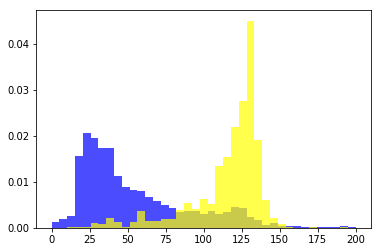

In [56]:
bins=np.linspace(0,200,40)
plt.hist(fullCorpus[fullCorpus['Labels'] == 'ham']['Body_Length'],bins= bins,alpha=0.7,normed=True,color='blue')    
plt.hist(fullCorpus[fullCorpus['Labels'] == 'spam']['Body_Length'],bins= bins,alpha=0.7,normed=True,color='yellow')
plt.show()

### If we don't normalize the default would be count and and since hamare greater than spam then we wouldn't get any comaprative result.

We can se that the body length of spam messages is for greater than that of ham.

So this feature would be useful

#### Now we can check the distribution of these new features to see if they need transformations.

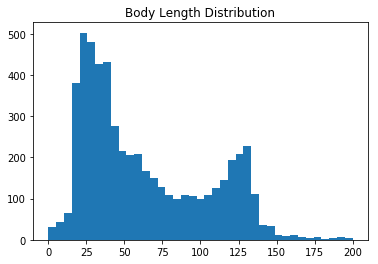

In [57]:
plt.hist(fullCorpus['Body_Length'],bins=bins)
plt.title('Body Length Distribution')
plt.show()

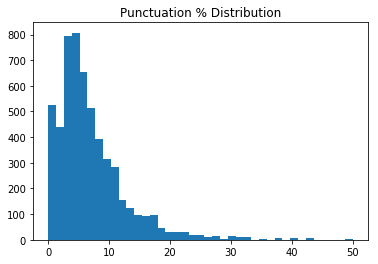

In [58]:
bins=np.linspace(0,50,40)
plt.hist(fullCorpus['Punct_percent'],bins)
plt.title('Punctuation % Distribution')
plt.show()

#### The puctuation Distribution is right skewed so it needs Power Transformation

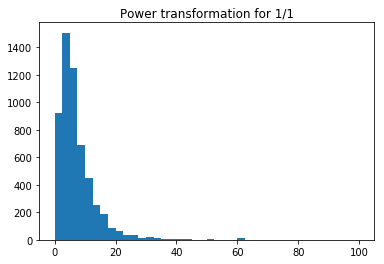

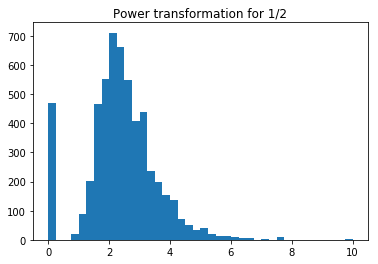

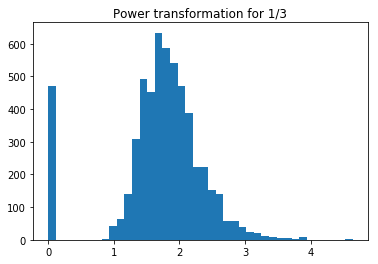

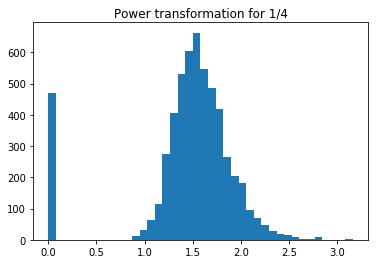

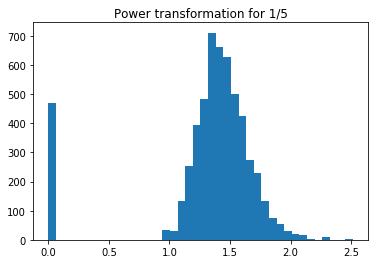

In [59]:
for i in [1,2,3,4,5]:
    plt.hist((fullCorpus['Punct_percent']) ** (1/i),bins=40)
    plt.title('Power transformation for 1/{}'.format(str(i)))
    plt.show()

#### So x ** 1/4 is right tranformation for this Punct_Percentage data

In [60]:
fullCorpus['Transformed_percent']=round(fullCorpus['Punct_percent'] ** (1/4),2)

In [61]:
fullCorpus.head()

,TextData,Labels,Tokenized_data,Cleaned_data,Cleaned_data_2,New_Cleaned_Data,Body_Length,Punct_percent,Transformed_percent
0,I've been searching for the right words to tha...,ham,"[ive, been, searching, for, the, right, words,...","[ive, been, search, for, the, right, word, to,...","[ive, been, searching, for, the, right, word, ...",ive searching right word thank breather promis...,160,2.5,1.26
1,Free entry in 2 a wkly comp to win FA Cup fina...,spam,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entri, in, 2, a, wkli, comp, to, win, f...","[free, entry, in, 2, a, wkly, comp, to, win, f...",free entry 2 wkly comp win fa cup final tkts 2...,128,4.7,1.47
2,"Nah I don't think he goes to usf, he lives aro...",ham,"[nah, i, dont, think, he, goes, to, usf, he, l...","[nah, i, dont, think, he, goe, to, usf, he, li...","[nah, i, dont, think, he, go, to, usf, he, lif...",nah dont think go usf life around though,49,4.1,1.42
3,Even my brother is not like to speak with me. ...,ham,"[even, my, brother, is, not, like, to, speak, ...","[even, my, brother, is, not, like, to, speak, ...","[even, my, brother, is, not, like, to, speak, ...",even brother like speak treat like aid patent,62,3.2,1.34
4,I HAVE A DATE ON SUNDAY WITH WILL!!,ham,"[i, have, a, date, on, sunday, with, will]","[i, have, a, date, on, sunday, with, will]","[i, have, a, date, on, sunday, with, will]",date sunday,28,7.1,1.63


In [88]:
X_Feature=pd.concat([fullCorpus['Body_Length'],fullCorpus['Transformed_percent'].reset_index(drop=True),Tfidf_Vect_df],axis=1)

In [64]:
from sklearn.ensemble import RandomForestClassifier

In [65]:
print(RandomForestClassifier())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


In [66]:
from sklearn.model_selection import KFold, cross_val_score

In [67]:
rf=RandomForestClassifier(n_jobs=-1)
kfold=KFold(n_splits=5)
cross_val_score(rf,X_Feature,fullCorpus['Labels'],cv=kfold,scoring='accuracy',n_jobs=-1)

array([0.97037702, 0.97217235, 0.96947935, 0.95870736, 0.96588869])

In [68]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.model_selection import train_test_split

In [69]:
train_X,test_X,train_Y,test_Y=train_test_split(X_Feature,fullCorpus['Labels'],test_size=0.2)

In [70]:
rf=RandomForestClassifier(n_estimators=50,n_jobs=-1,max_depth=20)
rf.fit(train_X,train_Y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=20, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [71]:
sorted(zip(rf.feature_importances_,X_Feature.columns),reverse=True)[0:10]

[(0.06918533357674171, 'Body_Length'),
 (0.04372991906514143, 'â'),
 (0.037514608747999806, 'call'),
 (0.034878224264290277, 'txt'),
 (0.03328323291089255, 'free'),
 (0.022902889264572276, 'prize'),
 (0.019807628959986435, 'service'),
 (0.015852074615329483, 'mobile'),
 (0.015791651691180367, 'claim'),
 (0.014043036452856872, 'text')]

In [72]:
y_pred=rf.predict(test_X)
precision,recall,fscore,support=score(y_pred,test_Y,pos_label='spam',average='binary')   ### pos_label means what we consider as positive prediction

#### GridSearch and CV

In [79]:
from sklearn.model_selection import GridSearchCV

In [82]:
rf=RandomForestClassifier()

In [84]:
params= {'max_depth': [ 10,20,100,None],
        'n_estimators':[50,100,150]}   

In [87]:
gs= GridSearchCV(rf,params,n_jobs=-1)   ### Here CV means number of folds
gs_fit=gs.fit(train_X,train_Y)
pd.DataFrame(gs_fit.cv_results_).sort_values('mean_test_score',ascending=False)[0:5]


C:\Users\ACER M5\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\ACER M5\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\ACER M5\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\ACER M5\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWa

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
8,30.006384,2.303914,0.681570,0.032086,100,150,"{'max_depth': 100, 'n_estimators': 150}",0.973082,0.973082,0.978437,0.974865,0.002524,1,1.0,0.999663,1.000000,0.999888,0.000159
7,17.297714,0.204232,0.491443,0.020756,100,100,"{'max_depth': 100, 'n_estimators': 100}",0.973082,0.973082,0.977763,0.974641,0.002206,2,1.0,0.999663,1.000000,0.999888,0.000159
6,17.397554,4.032213,0.676520,0.061624,100,50,"{'max_depth': 100, 'n_estimators': 50}",0.970390,0.974428,0.977763,0.974192,0.003014,3,1.0,0.999327,0.999327,0.999551,0.000317
11,17.315709,2.212463,0.430159,0.049520,None,150,"{'max_depth': None, 'n_estimators': 150}",0.972409,0.973082,0.977089,0.974192,0.002065,3,1.0,1.000000,1.000000,1.000000,0.000000
10,16.757154,0.198815,0.577088,0.048401,None,100,"{'max_depth': None, 'n_estimators': 100}",0.969717,0.973755,0.977089,0.973519,0.003014,5,1.0,1.000000,1.000000,1.000000,0.000000


### In the same way, we can use Gradient Boosting and then test them separately them on Count_Vector, Tfidf vector or N_Grams Vectors and see which yields best result

### Final Points:

1. Split data in number of ways and see how model is performing there

2. Check what is the business requirement (they want less FP or less FN)